E-COMMERCE RETURN PREDICTION

USING Python, Pandas, NumPy, Matplotlib, scikit-learn(Linear Regression)

Objectives:
Predict the number of product returns based on historical sales, discounts, and average reviews
- Identify which factors influence returns the most
- Visualize predictions and feature importance for business insights

1. Importing libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Insights:
Imported all required libraries:
Pandas & NumPy for data manipulation,
scikit-learn for Linear Regression and evaluation
Matplotlib for visualization.
This sets up the environment for data analysis and modeling.

2. Loading Dataset

In [14]:
df = pd.read_csv("ecommerce_returns.csv")
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Week  Units_Sold  Discount_Percent  Avg_Review  Returns
0     1          50                10         4.5        5
1     2          60                 0         4.2        3
2     3          55                 5         4.8        4
3     4          70                15         4.1        8
4     5          65                10         4.6        6


Insights:
Loaded the e-commerce returns dataset.
The first few rows show weekly sales, discount percentages, average reviews, and corresponding returns.
Observing the data helps understand the relationships between features and target.

3. Checking Missing Values

In [15]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Week                0
Units_Sold          0
Discount_Percent    0
Avg_Review          0
Returns             0
dtype: int64


Insights:
Checked for missing values.
Dataset is complete with no missing data, so no imputation is needed.
Clean data ensures accurate model training.

4. Select Features and Target

Features: Units_Sold, Discount_Percent, Avg_Review

Target: Returns

In [16]:
X = df[['Units_Sold','Discount_Percent','Avg_Review']]
y = df['Returns']

Insights:
Selected features and target variable:

Features: Units Sold, Discount Percent, Average Review

Target: Returns
These features are expected to influence the number of returns, making the model interpretable.

5. Split Dataset into Training and Test sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Insights:
Split the dataset into training (80%) and testing (20%) sets.
Training set is used to learn the relationships, while test set evaluates model performance on unseen data.

6. Train Linear Regression Model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Insights:
Trained a Linear Regression model to predict returns.
The model finds coefficients for each feature, showing how much each influences the number of returns.

7. Make Predictions

In [19]:
y_pred = model.predict(X_test)

Insights:
Generated predictions on the test set.
Comparing predicted returns with actual returns helps evaluate model accuracy.

8. Evaluate Model

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Model Performance:
Mean Squared Error: 0.14
R2 Score: 0.97


Insights:
Evaluated the model using:
Mean Squared Error (MSE): Measures average squared difference between predicted and actual returns.
R² Score: Shows how well the features explain variability in returns.
A higher R² (close to 1) indicates good predictive performance.

9. Visualise Predictions VS Actual

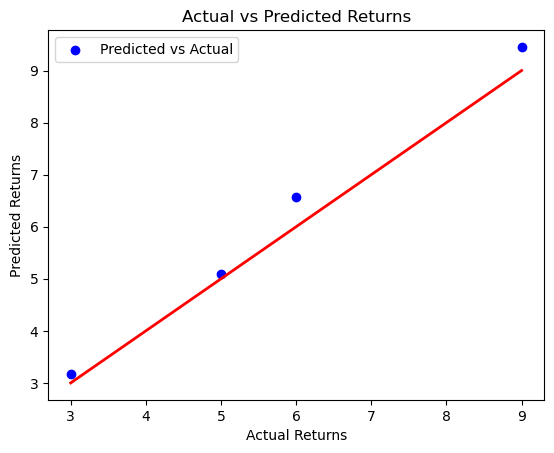

In [21]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Returns")
plt.ylabel("Predicted Returns")
plt.title("Actual vs Predicted Returns")
plt.legend()
plt.show()

Insights:
Visualized actual vs predicted returns.
Blue dots: Predicted vs actual returns
Red line: Ideal prediction (predicted = actual)
Observations: Most points are close to the red line → good model accuracy.

10. Feature Importance Coefficients

In [22]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(coef_df)


Feature Importance:
            Feature  Coefficient
0        Units_Sold     0.036601
1  Discount_Percent     0.269160
2        Avg_Review    -1.372398


Insights:
Examined feature importance:
Units_Sold has the highest positive coefficient → more sales lead to more returns.
Discount_Percent has a smaller positive effect → higher discounts slightly increase returns.
Avg_Review has a negative coefficient → better reviews reduce returns.

11. Predict returns if a product sells 100 units, discount :10%, average review: 4.5

In [23]:
example = pd.DataFrame({'Units_Sold':[100], 'Discount_Percent':[10], 'Avg_Review':[4.5]})
predicted_return = model.predict(example)
print(f"\nPredicted Returns for Example: {predicted_return[0]:.2f}")


Predicted Returns for Example: 6.92


Insights:
Example prediction shows the model can estimate returns for new scenarios.
For example: 100 units sold, 10% discount, 4.5 average review → ~6 returns
This helps businesses plan inventory and manage product returns effectively.